In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Data_Train.csv")

In [ ]:
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [ ]:
data.shape

(6019, 12)

In [ ]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

# Data Cleaning


In [ ]:
data.groupby(by=['Fuel_Type']).size()

Fuel_Type
CNG           56
Diesel      3205
Electric       2
LPG           10
Petrol      2746
dtype: int64

Removing outliers in fuel type

In [ ]:
data = data[data['Fuel_Type'] != 'Electric']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


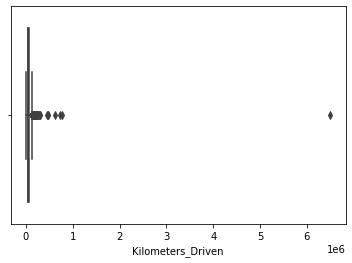

In [ ]:
sns.boxplot(data.Kilometers_Driven)

In [ ]:
print(len(data[data['Kilometers_Driven'] > 500000]))
print(len(data[data['Kilometers_Driven'] < 1000]))

4
2


Removing outliers in kilometers driven

In [ ]:
data = data[data['Kilometers_Driven'] < 500000]
data = data[data['Kilometers_Driven'] > 1000]

modifying car names by brands

In [ ]:
data.Name = data.Name.str.split().str.get(0)

In [ ]:
data['Name'].value_counts()

Maruti           1208
Hyundai          1104
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        313
Ford              299
Mahindra          271
BMW               266
Audi              236
Tata              184
Skoda             172
Renault           144
Chevrolet         121
Nissan             91
Land               60
Jaguar             39
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Lamborghini         1
Ambassador          1
Bentley             1
Smart               1
Name: Name, dtype: int64

Removing outliers in brand name

In [ ]:
data = data[data['Name'] != 'Force']
data = data[data['Name'] != 'ISUZU']
data = data[data['Name'] != 'Bentley']
data = data[data['Name'] != 'Lamborghini']
data = data[data['Name'] != 'Isuzu']
data = data[data['Name'] != 'Smart']
data = data[data['Name'] != 'Ambassador']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


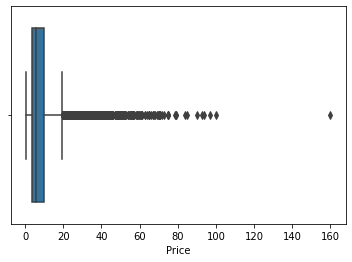

In [ ]:
sns.boxplot(data.Price)

In [ ]:
print(data.Price.min())
print(data.Price.max())

0.44
160.0


Removing outliers in price

In [ ]:
data = data[data.Price < 120]

# Data Transformation

In [ ]:
data.groupby(by=['Location']).size()

Location
Ahmedabad     223
Bangalore     358
Chennai       488
Coimbatore    635
Delhi         552
Hyderabad     739
Jaipur        410
Kochi         651
Kolkata       531
Mumbai        785
Pune          619
dtype: int64

In [ ]:
data.groupby(by=['Transmission']).size()

Transmission
Automatic    1708
Manual       4283
dtype: int64

In [ ]:
data.groupby(by=['Owner_Type']).size()

Owner_Type
First             4904
Fourth & Above       9
Second             967
Third              111
dtype: int64

In [ ]:
data.groupby(by=['Fuel_Type']).size()

Fuel_Type
CNG         56
Diesel    3191
LPG         10
Petrol    2734
dtype: int64

Converting Mileage, Engine and Power to numerical columns

In [ ]:
data.Mileage = data.Mileage.str.split().str.get(0).astype('float')
data.Engine = data.Engine.str.split().str.get(0).astype('int', errors='ignore')
data.Power = data.Power.str.split().str.get(0).astype('float', errors='ignore')
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74


Performing label encoding for categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Name'] = label_encoder.fit_transform(data['Name'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Transmission'] = label_encoder.fit_transform(data['Transmission'])
data['Fuel_Type'] = label_encoder.fit_transform(data['Fuel_Type'])
data['Owner_Type'] = label_encoder.fit_transform(data['Owner_Type'])

Applying log to price to normalise it

In [ ]:
data.Price = np.log1p(data.Price)

In [ ]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
data.Engine = pd.to_numeric(data.Engine, errors='coerce')
data.Power = pd.to_numeric(data.Power, errors='coerce')

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
data[["Engine", "Power", "Seats"]] = imputer.fit_transform(data[["Engine", "Power", "Seats"]])

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.corr()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Name,1.000000,0.024777,0.013957,0.121956,-0.064763,0.162476,-0.025106,-0.024857,0.019435,-0.171210,0.179460,-0.104242
Location,0.024777,1.000000,-0.021806,-0.068880,0.112225,0.039766,-0.033430,0.018444,-0.077379,-0.064013,-0.037066,-0.137787
Year,0.013957,-0.021806,1.000000,-0.479309,-0.131113,-0.098072,-0.384746,0.321657,-0.049444,0.017514,0.010475,0.475801
Kilometers_Driven,0.121956,-0.068880,-0.479309,1.000000,-0.235727,0.117427,0.226469,-0.160348,0.171469,0.006489,0.231611,-0.198334
Fuel_Type,-0.064763,0.112225,-0.131113,-0.235727,1.000000,0.122351,0.043111,-0.159193,-0.399828,-0.263787,-0.295476,-0.405444
Transmission,0.162476,0.039766,-0.098072,0.117427,0.122351,1.000000,0.003558,0.332546,-0.501672,-0.643594,0.072891,-0.632798
Owner_Type,-0.025106,-0.033430,-0.384746,0.226469,0.043111,0.003558,1.000000,-0.152090,0.047381,0.026064,0.007447,-0.175652
Mileage,-0.024857,0.018444,0.321657,-0.160348,-0.159193,0.332546,-0.152090,1.000000,-0.589779,-0.507243,-0.310045,-0.276737
Engine,0.019435,-0.077379,-0.049444,0.171469,-0.399828,-0.501672,0.047381,-0.589779,1.000000,0.857017,0.402472,0.697288
Power,-0.171210,-0.064013,0.017514,0.006489,-0.263787,-0.643594,0.026064,-0.507243,0.857017,1.000000,0.109026,0.772817


# Data Model Building


# **LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


X=data.drop(['Price'],axis=1)
y=data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

In [ ]:
print(LR_model.score(X_test,y_test))

0.8665628706716398


In [ ]:
X_test=['Mumbai']

In [ ]:
model.predict(X_test).shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.20529996145308088
Mean Squared Error: 0.07236931263290768
Root Mean Squared Error: 0.26901545054681836
R2 score : 0.866563


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results=cross_val_score(LR_model,X,y,cv=10)

In [ ]:
print(cv_results)

[0.87427459 0.87396366 0.86758811 0.86525723 0.88143146 0.83457205
 0.86970425 0.87021835 0.86511741 0.88560568]


In [ ]:
print("Accuracy by cross validation : ",cv_results.mean())

Accuracy by cross validation :  0.8687732796288777


# **DECISION TREE REGRESSION**

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
#Decision

DT_model = DecisionTreeRegressor(random_state = 0) 

DT_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y1_pred = DT_model.predict(X_test)

In [ ]:
print(DT_model.score(X_test,y_test))

0.867886534322946


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y1_pred)))
print("R2 score : %f" % r2_score(y_test,y1_pred))

Mean Absolute Error: 0.17959142292136213
Mean Squared Error: 0.07165142677097136
Root Mean Squared Error: 0.26767784138955425
R2 score : 0.867887


**CROSS VALIDATION**

In [ ]:
cv_results1=cross_val_score(DT_model,X,y,cv=20)
print(cv_results1)

[0.91105393 0.92214003 0.8782516  0.84718586 0.81949337 0.84528015
 0.9025516  0.91820066 0.92682171 0.85866878 0.8007082  0.86288382
 0.87381469 0.8477645  0.90676171 0.91937861 0.91104811 0.86187393
 0.90208204 0.87333321]


In [ ]:
print("Accuracy by cross validation : ",cv_results1.mean())

Accuracy by cross validation :  0.8794648250556284


# **RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


#X=data.drop(['Price'],axis=1)
#y=data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

0.9298851785648025

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score : %f" % r2_score(y_test,y_pred))

Mean Absolute Error: 0.13055230685304747
Mean Squared Error: 0.038026608172586546
Root Mean Squared Error: 0.1950041234758551
R2 score : 0.929885


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results=cross_val_score(model,X,y,cv=10)

In [ ]:
print(cv_results)

[0.94731353 0.94321755 0.91186603 0.94098657 0.9463021  0.89744822
 0.93189163 0.94631213 0.94358974 0.95086679]


In [ ]:
print("Accuracy by cross validation : ",cv_results.mean())


Accuracy by cross validation :  0.9359794300348341


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


X=data.drop(['Price'],axis=1)
y = np.log1p(data['Price']*100000)
y=y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
k_range=range(1,26)
scores={}
scores_list=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
for i in scores:
  print(i,"  :  ",scores[i])

1   :   0.731442869057548
2   :   0.6663886572143453
3   :   0.7389491242702252
4   :   0.7139282735613011
5   :   0.7389491242702252
6   :   0.7164303586321935
7   :   0.74395329441201
8   :   0.7172643869891576
9   :   0.7264386989157632
10   :   0.7155963302752294
11   :   0.725604670558799
12   :   0.7306088407005839
13   :   0.7322768974145121
14   :   0.7306088407005839
15   :   0.7331109257714762
16   :   0.7322768974145121
17   :   0.7364470391993327
18   :   0.7306088407005839
19   :   0.7339449541284404
20   :   0.7239366138448707
21   :   0.7306088407005839
22   :   0.7214345287739783
23   :   0.7297748123436196
24   :   0.7322768974145121
25   :   0.7247706422018348


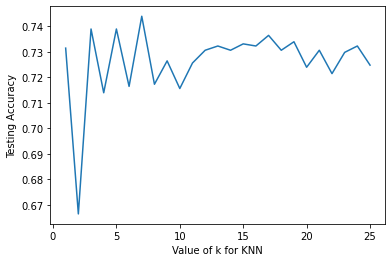

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

model has best accuracy when k is 7

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.74395329441201

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.27689741451209343
Mean Squared Error: 0.28023352793994993
Root Mean Squared Error: 0.5293708793841515


**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results=cross_val_score(knn,X,y,cv=7)

In [ ]:
print(cv_results)

[0.77219626 0.73481308 0.74649533 0.73364486 0.7161215  0.75
 0.76608187]


In [ ]:
print("Accuracy by cross validation : ",cv_results.mean())

Accuracy by cross validation :  0.7456218427689161


# Visualization

In [ ]:
import seaborn as sns
sns.color_palette("viridis", as_cmap=True)
import matplotlib.pyplot as mp

(array([ 138.,  496., 1390., 1640.,  985.,  498.,  415.,  275.,  124.,
          30.]),
 array([0.36464311, 0.78969085, 1.21473859, 1.63978633, 2.06483407,
        2.48988182, 2.91492956, 3.3399773 , 3.76502504, 4.19007278,
        4.61512052]),
 <a list of 10 Patch objects>)

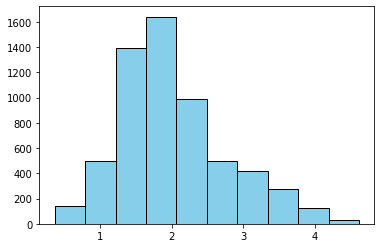

In [ ]:
plt.hist(data.Price,edgecolor="black",color="skyblue")

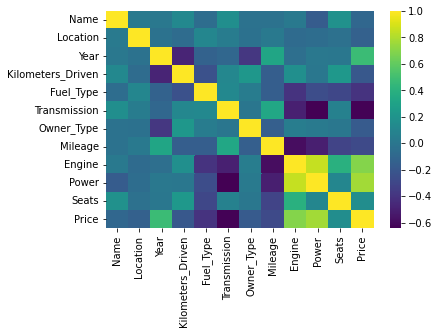

In [ ]:
correlation_plot = sns.heatmap(data.corr(), cmap='viridis', annot=False)

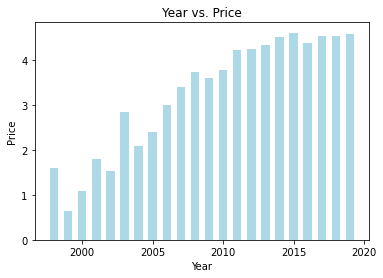

In [ ]:
plt.bar(data['Year'],data['Price'], color='lightblue', width=0.6)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year vs. Price")
plt.show()

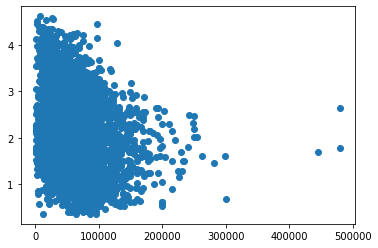

In [ ]:
plt.scatter(data['Kilometers_Driven'], data['Price'])

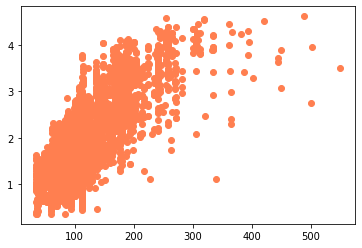

In [ ]:
plt.scatter(x=data['Power'], y=data['Price'], color='coral')

# PERMORMANCE ANALYSIS

In [ ]:
import seaborn as sns
import pandas as pd

**Model Comparison**

In [ ]:
res=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/result_stats.csv")

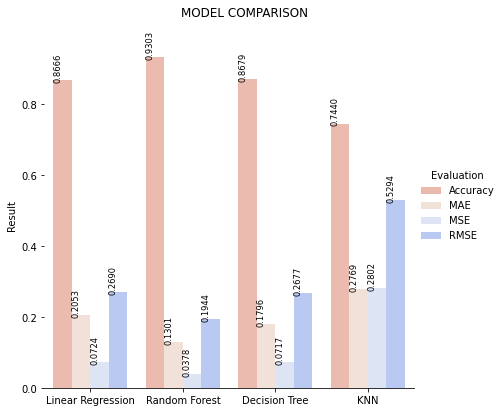

In [ ]:
g = sns.catplot(
    data=res, kind="bar",
    x="Model", y="Result", hue="Type",ci="sd", palette="coolwarm_r", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Evaluation")
g.fig.suptitle('MODEL COMPARISON')

g.fig.subplots_adjust(top=0.9)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

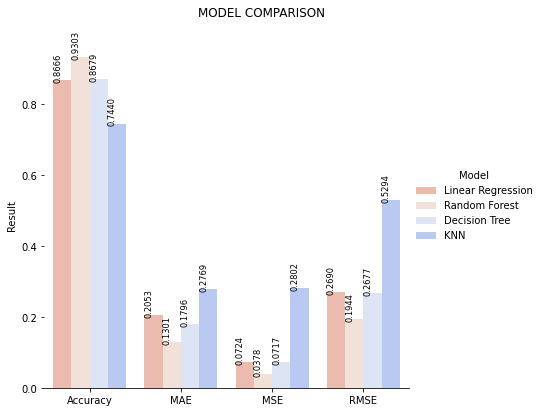

In [ ]:
g = sns.catplot(
    data=res, kind="bar",
    x="Type", y="Result", hue="Model",ci="sd", palette="coolwarm_r", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Model")
g.fig.suptitle('MODEL COMPARISON')

g.fig.subplots_adjust(top=0.9)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

**Train-Test**

In [ ]:
res1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/result_stats_1.csv")

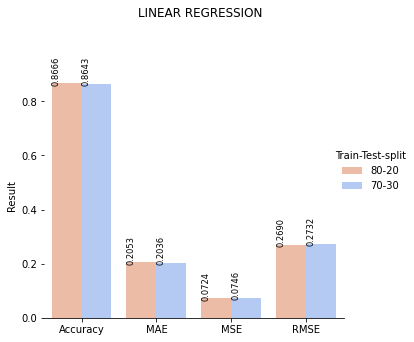

In [ ]:
g = sns.catplot(
    data=res1.iloc[:8,:], kind="bar",
    x="Type", y="Result", hue='Train_Test',ci="sd", palette="coolwarm_r"
)


g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Train-Test-split")
g.fig.suptitle('LINEAR REGRESSION')

g.fig.subplots_adjust(top=0.8)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

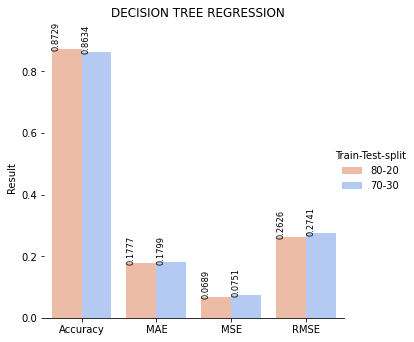

In [ ]:
g = sns.catplot(
    data=res1.iloc[8:16,:], kind="bar",
    x="Type", y="Result", hue='Train_Test',ci="sd", palette="coolwarm_r"
)
g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Train-Test-split")
g.fig.suptitle('DECISION TREE REGRESSION ')

g.fig.subplots_adjust(top=0.9)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

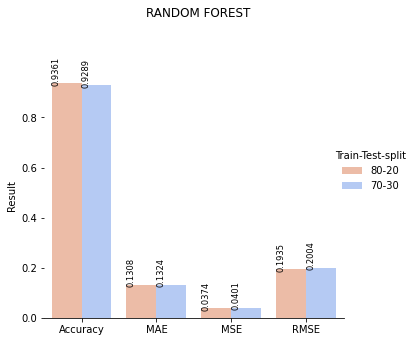

In [ ]:
g = sns.catplot(
    data=res1.iloc[16:24,:], kind="bar",
    x="Type", y="Result", hue='Train_Test',ci="sd", palette="coolwarm_r"
)
g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Train-Test-split")
g.fig.suptitle('RANDOM FOREST ')

g.fig.subplots_adjust(top=0.8)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

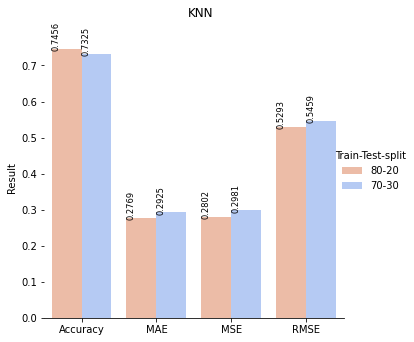

In [ ]:
g = sns.catplot(
    data=res1.iloc[24:32,:], kind="bar",
    x="Type", y="Result", hue='Train_Test',ci="sd", palette="coolwarm_r"
)
g.despine(left=True)
g.set_axis_labels("", "Result")
g.legend.set_title("Train-Test-split")
g.fig.suptitle('KNN')

g.fig.subplots_adjust(top=0.9)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')

**CV**

In [ ]:
res2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/cv_stats.csv")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


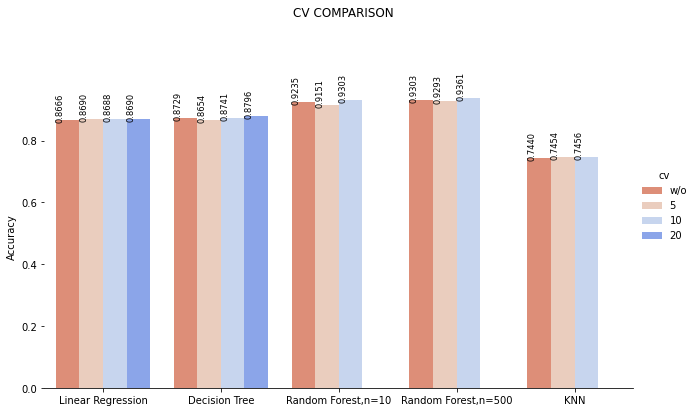

In [ ]:
g = sns.catplot(
    data=res2, kind="bar",
    x="Model", y="Accuracy", hue="CV", palette="coolwarm_r",aspect=1.5,height=6
    )
g.despine(left=True)
g.set_axis_labels("", "Accuracy")
g.legend.set_title("cv")
g.fig.suptitle('CV COMPARISON')

g.fig.subplots_adjust(top=0.8)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x(), 
            p.get_height(), 
           '{0:.4f}'.format(p.get_height()), 
            color='black', 
            rotation='vertical', 
            size='small')